# Effectiveness of Different Teaching Methods Analysis

### Import Libraries

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency,f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr
from scipy.stats import kruskal
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [4]:
df = pd.read_csv(r"C:\Users\pc\Desktop\IDS_Project\IDSproject.csv")

In [6]:
df.head()

,Gender,EngagingMethod,MotivationDuringTL,HandsOnActivityHelp,TLPerformance,GroupDiscussion,MultimediaEffectiveness,TeacherInteraction,IMEncourageness,PeerLearning,Retention,ELinRealWorld,PreferMedia,ChallengesTL,Suggestions,AgeGroup,Score,Dropdown
0,Male,Experiential methods,Rarely,Strongly agree,No,Very effective,Good,Rarely,Strongly agree,Strongly agree,Experiential methods,Very effective,Agree,Lack of engagement,NaN,Above 34,NaN,NaN
1,Male,Experiential methods,Sometimes,Strongly agree,No,Very effective,Excellent,Often,Agree,Yes,Experiential methods,Very effective,Strongly agree,No hands-on learning opportunities,NaN,25–34,0.0,NaN
2,Female,Interactive methods,Rarely,Strongly agree,Not sure,Very effective,Excellent,Sometimes,Neutral,Yes,Experiential methods,Effective,Neutral,One-way communication,NaN,18–24,0.0,NaN
3,Male,Traditional lectures,Often,Agree,Yes,Neutral,Excellent,Often,Neutral,Yes,Traditional lectures,Neutral,Strongly agree,Lack of engagement,NaN,18–24,0.0,NaN
4,Female,Experiential methods,Often,Agree,Yes,Neutral,Good,Sometimes,Agree,No,Experiential methods,Very effective,Strongly agree,No hands-on learning opportunities,NaN,25–34,0.0,NaN


### Drop Irrelevent Columns

In [8]:
df = df.drop(columns=['Score'])
df = df.drop(columns=['Dropdown'])
df = df.drop(columns=['Suggestions'])
df.head()

,Gender,EngagingMethod,MotivationDuringTL,HandsOnActivityHelp,TLPerformance,GroupDiscussion,MultimediaEffectiveness,TeacherInteraction,IMEncourageness,PeerLearning,Retention,ELinRealWorld,PreferMedia,ChallengesTL,AgeGroup
0,Male,Experiential methods,Rarely,Strongly agree,No,Very effective,Good,Rarely,Strongly agree,Strongly agree,Experiential methods,Very effective,Agree,Lack of engagement,Above 34
1,Male,Experiential methods,Sometimes,Strongly agree,No,Very effective,Excellent,Often,Agree,Yes,Experiential methods,Very effective,Strongly agree,No hands-on learning opportunities,25–34
2,Female,Interactive methods,Rarely,Strongly agree,Not sure,Very effective,Excellent,Sometimes,Neutral,Yes,Experiential methods,Effective,Neutral,One-way communication,18–24
3,Male,Traditional lectures,Often,Agree,Yes,Neutral,Excellent,Often,Neutral,Yes,Traditional lectures,Neutral,Strongly agree,Lack of engagement,18–24
4,Female,Experiential methods,Often,Agree,Yes,Neutral,Good,Sometimes,Agree,No,Experiential methods,Very effective,Strongly agree,No hands-on learning opportunities,25–34


In [10]:
df.describe()

,Gender,EngagingMethod,MotivationDuringTL,HandsOnActivityHelp,TLPerformance,GroupDiscussion,MultimediaEffectiveness,TeacherInteraction,IMEncourageness,PeerLearning,Retention,ELinRealWorld,PreferMedia,ChallengesTL,AgeGroup
count,305,305,305,305,305,305,305,305,305,305,305,305,305,305,305
unique,2,3,5,5,3,5,5,5,5,5,3,5,5,4,3
top,Male,Experiential methods,Sometimes,Agree,Yes,Effective,Excellent,Often,Agree,Yes,Experiential methods,Effective,Strongly agree,One-way communication,18–24
freq,172,129,89,123,136,116,119,95,126,132,152,119,102,113,178


### Data Overview

In [12]:
df.shape

(305, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   305 non-null    object
 1   EngagingMethod           305 non-null    object
 2   MotivationDuringTL       305 non-null    object
 3   HandsOnActivityHelp      305 non-null    object
 4   TLPerformance            305 non-null    object
 5   GroupDiscussion          305 non-null    object
 6   MultimediaEffectiveness  305 non-null    object
 7   TeacherInteraction       305 non-null    object
 8   IMEncourageness          305 non-null    object
 9   PeerLearning             305 non-null    object
 10  Retention                305 non-null    object
 11  ELinRealWorld            305 non-null    object
 12  PreferMedia              305 non-null    object
 13  ChallengesTL             305 non-null    object
 14  AgeGroup                 305 non-null    o

In [16]:
df.columns

Index(['Gender', 'EngagingMethod', 'MotivationDuringTL', 'HandsOnActivityHelp',
       'TLPerformance', 'GroupDiscussion', 'MultimediaEffectiveness',
       'TeacherInteraction', 'IMEncourageness', 'PeerLearning', 'Retention',
       'ELinRealWorld', 'PreferMedia', 'ChallengesTL', 'AgeGroup'],
      dtype='object')

### DataTypes and Unique Count

In [19]:
df.dtypes

Gender                     object
EngagingMethod             object
MotivationDuringTL         object
HandsOnActivityHelp        object
TLPerformance              object
GroupDiscussion            object
MultimediaEffectiveness    object
TeacherInteraction         object
IMEncourageness            object
PeerLearning               object
Retention                  object
ELinRealWorld              object
PreferMedia                object
ChallengesTL               object
AgeGroup                   object
dtype: object

In [21]:
df.nunique()

Gender                     2
EngagingMethod             3
MotivationDuringTL         5
HandsOnActivityHelp        5
TLPerformance              3
GroupDiscussion            5
MultimediaEffectiveness    5
TeacherInteraction         5
IMEncourageness            5
PeerLearning               5
Retention                  3
ELinRealWorld              5
PreferMedia                5
ChallengesTL               4
AgeGroup                   3
dtype: int64

In [23]:
missing = df.isnull().sum()
missing

Gender                     0
EngagingMethod             0
MotivationDuringTL         0
HandsOnActivityHelp        0
TLPerformance              0
GroupDiscussion            0
MultimediaEffectiveness    0
TeacherInteraction         0
IMEncourageness            0
PeerLearning               0
Retention                  0
ELinRealWorld              0
PreferMedia                0
ChallengesTL               0
AgeGroup                   0
dtype: int64

### Unique Age Group

In [27]:
print(df['AgeGroup'].unique())

['Above 34' '25–34' '18–24']


In [29]:
age_group_count = df['AgeGroup'].value_counts()
age_group_count

AgeGroup
18–24       178
25–34        71
Above 34     56
Name: count, dtype: int64

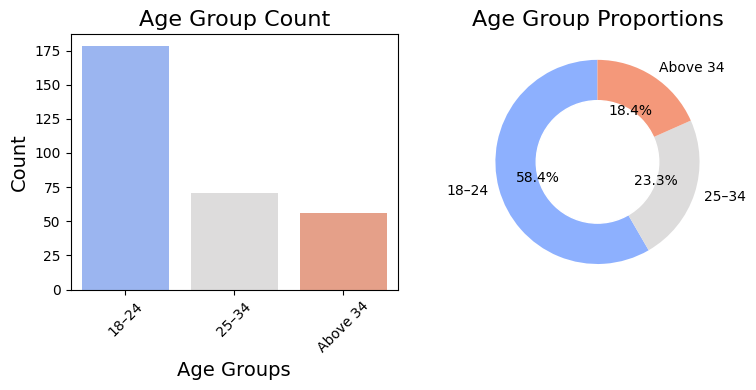

In [31]:
# Assuming age_group_count is a pandas Series containing the count of each age group
age_group_count = age_group_count  # Replace with your actual data

# Calculate proportions
age_group_proportions = age_group_count / age_group_count.sum()

# Create the bar chart for count
plt.figure(figsize=(8, 4))

# First subplot for bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=age_group_count.index, y=age_group_count.values, palette="coolwarm")
plt.title("Age Group Count", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

# Second subplot for donut chart (proportions)
plt.subplot(1, 2, 2)
plt.pie(age_group_proportions, labels=age_group_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(age_group_count)))
plt.title("Age Group Proportions", fontsize=16)
plt.gca().set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.gca().add_artist(plt.Circle((0, 0), 0.60, color='white'))  # Create a donut chart

# Display the plots
plt.tight_layout()
plt.show()


### Count of Gender

In [34]:
gender = df['Gender'].value_counts()
gender

Gender
Male      172
Female    133
Name: count, dtype: int64

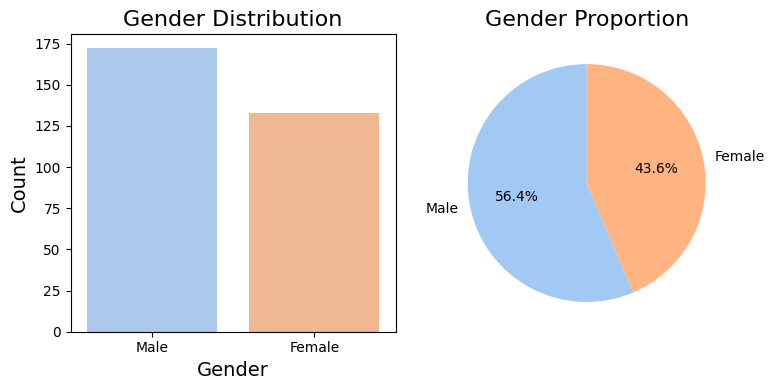

In [36]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Bar Plot (Left)
sns.barplot(x=gender.index, y=gender.values, palette="pastel", ax=axes[0])
axes[0].set_title("Gender Distribution", fontsize=16)
axes[0].set_xlabel("Gender", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)

# Pie Chart (Right)
axes[1].pie(
    gender, 
    labels=gender.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    startangle=90
)
axes[1].set_title("Gender Proportion", fontsize=16)

# Adjust layout and show
plt.tight_layout()
plt.show()


### Challenges In Traditional Base Lecture

In [39]:
challenges= df['ChallengesTL'].value_counts()
challenges

ChallengesTL
One-way communication                 113
Lack of engagement                     84
No hands-on learning opportunities     84
Overwhelming content                   24
Name: count, dtype: int64

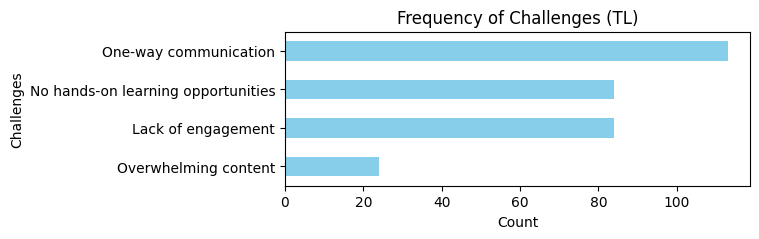

In [41]:
# Horizontal bar plot
challenges.sort_values(ascending=True).plot(kind='barh', figsize=(6, 2), color='skyblue')
plt.title('Frequency of Challenges (TL)')
plt.xlabel('Count')
plt.ylabel('Challenges')
plt.show()

### Rention Methods

In [43]:
retention= df['Retention'].value_counts()
retention


Retention
Experiential methods    152
Interactive methods      89
Traditional lectures     64
Name: count, dtype: int64

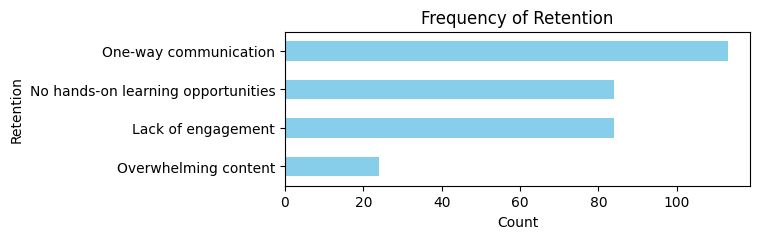

In [45]:
# Horizontal bar plot
challenges.sort_values(ascending=True).plot(kind='barh', figsize=(6, 2), color='skyblue')
plt.title('Frequency of Retention')
plt.xlabel('Count')
plt.ylabel('Retention')
plt.show()

### Target Column(EngagingMethod)

In [47]:
method= df['EngagingMethod'].value_counts()
method

EngagingMethod
Experiential methods    129
Interactive methods     115
Traditional lectures     61
Name: count, dtype: int64

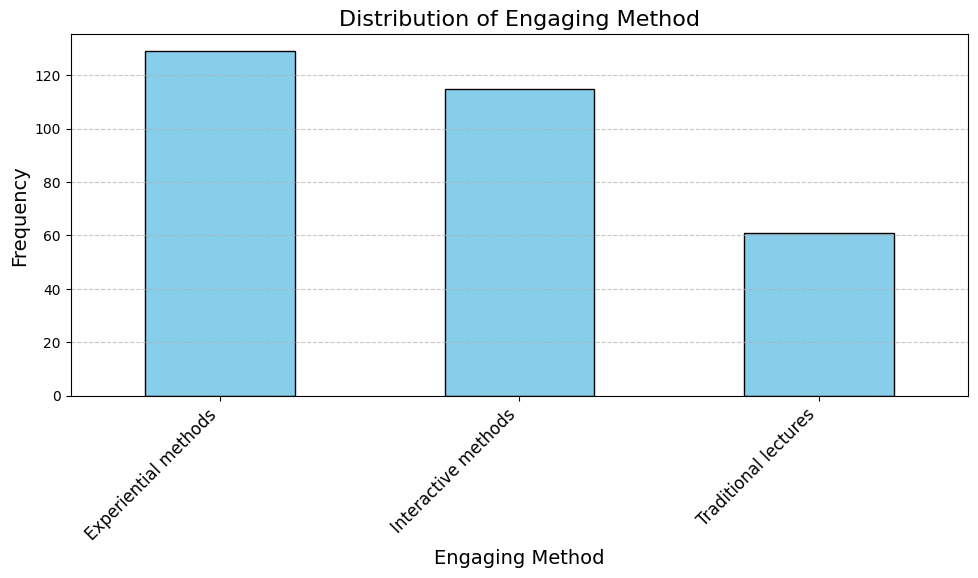

In [49]:
# Analyze the distribution of the target column
target_distribution = df['EngagingMethod'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))  # Figure size remains 8x4
target_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Engaging Method', fontsize=16)
plt.xlabel('Engaging Method', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=1.5)  # Added padding to fix layout

# Show the plot
plt.show()


## Univariate Analysis

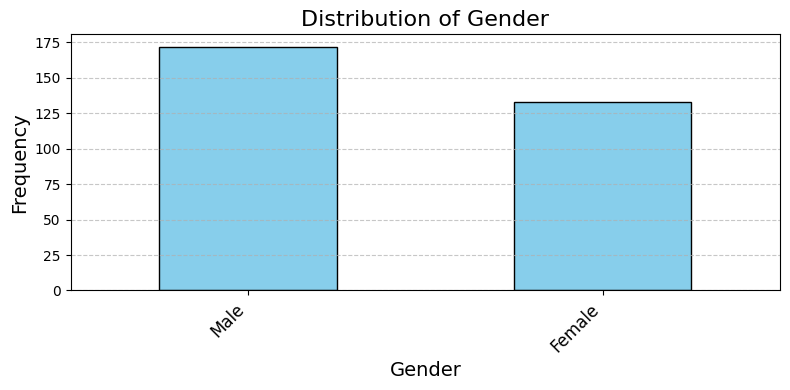

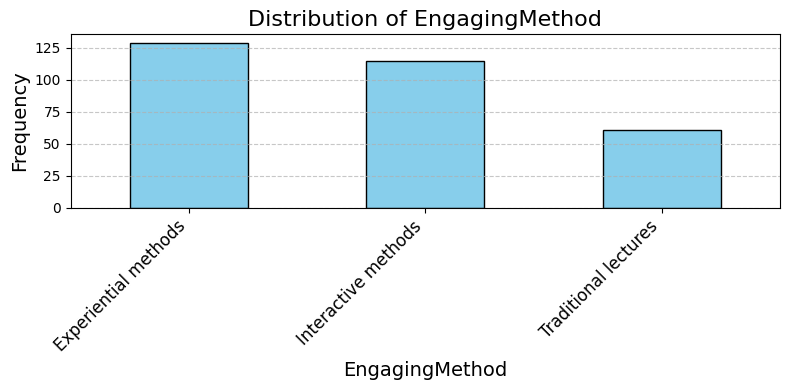

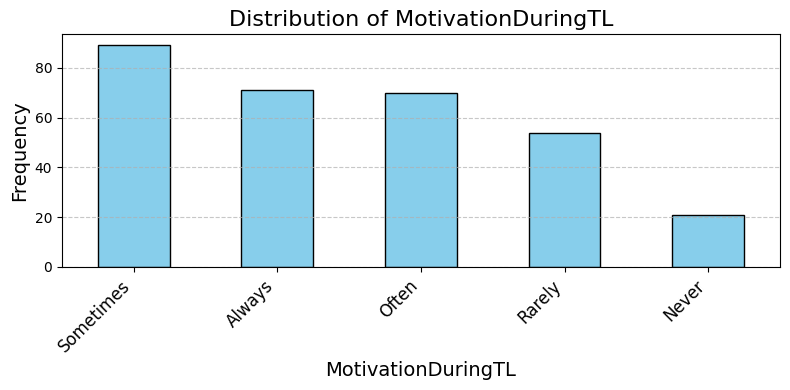

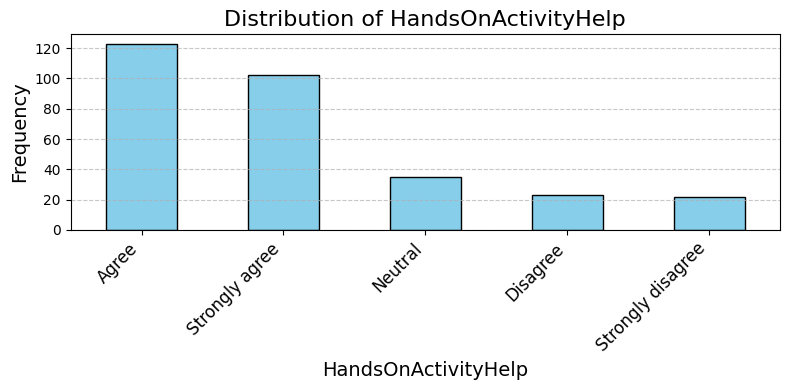

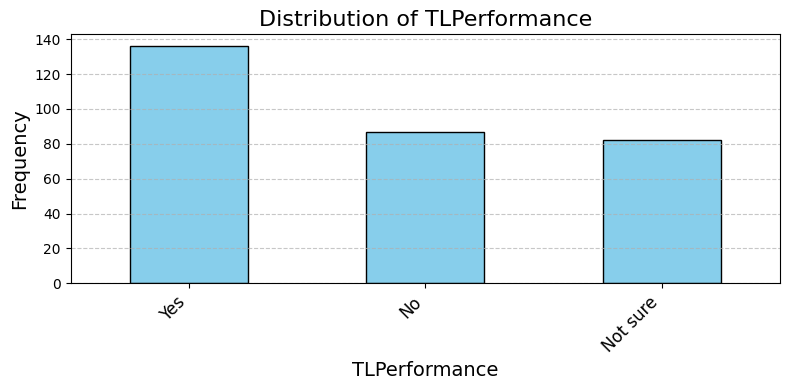

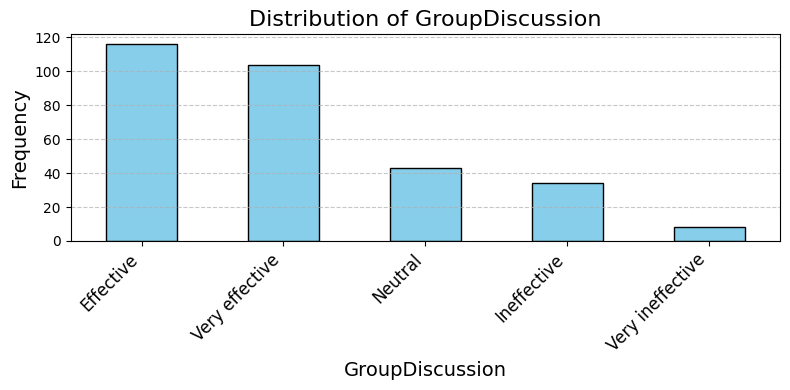

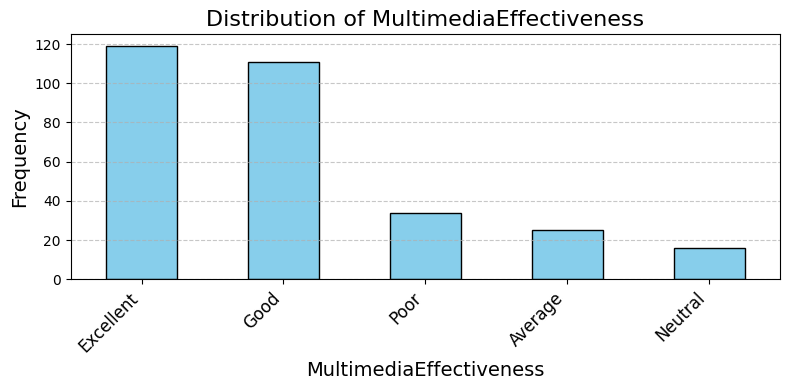

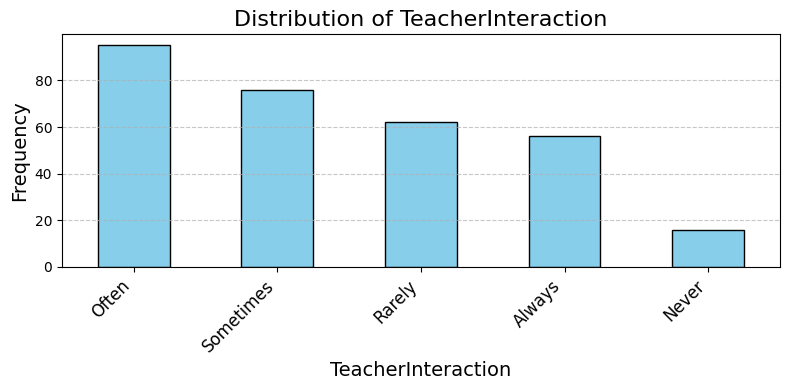

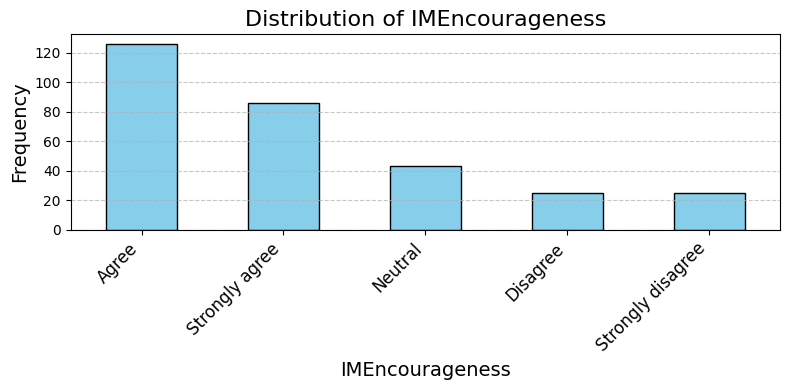

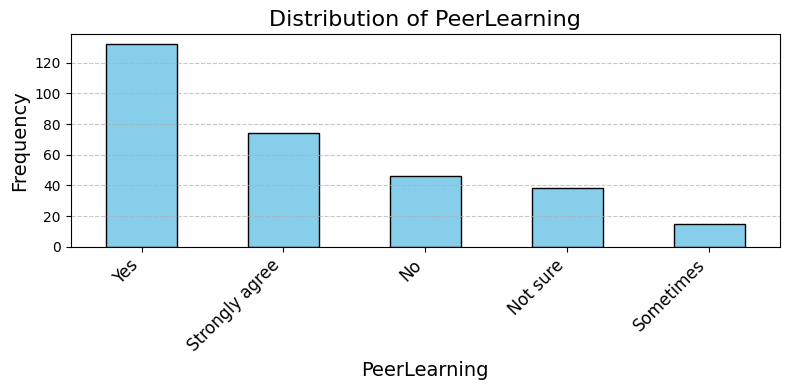

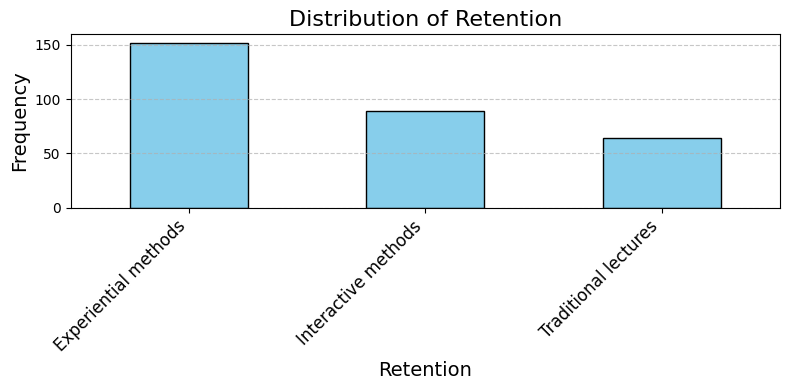

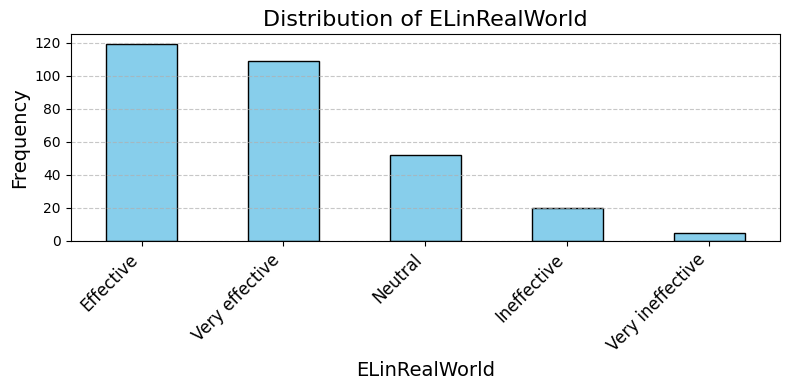

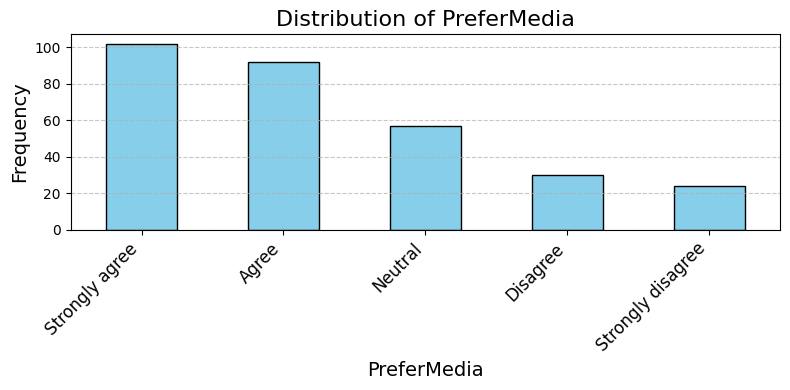

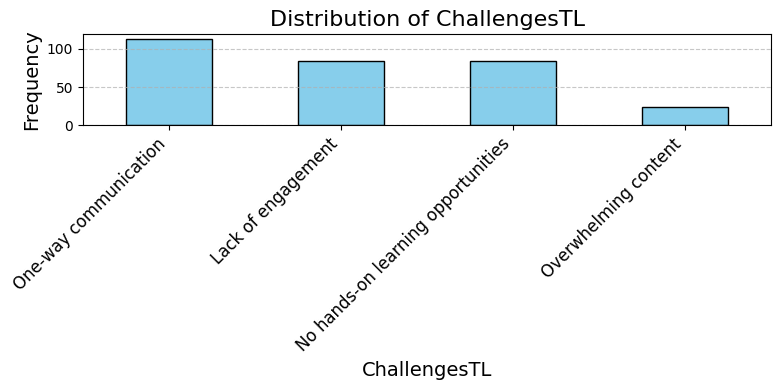

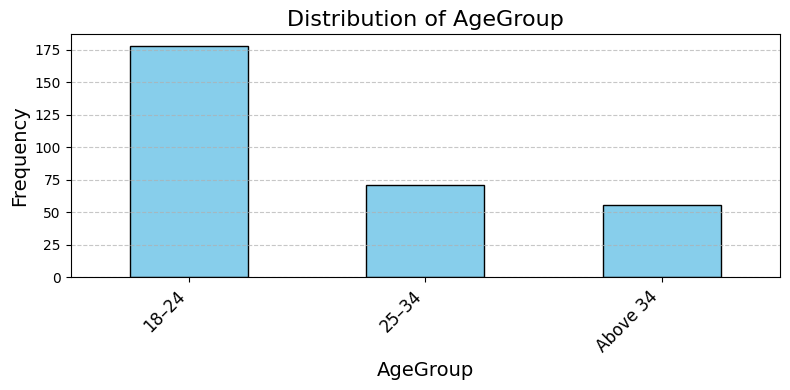

In [52]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar charts for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

### Gender Vs EngagingMethod

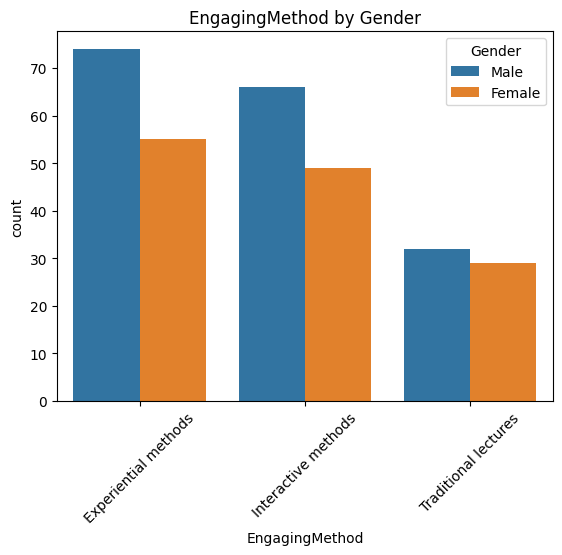

In [54]:
# Gender vs. EngagingMethod
sns.countplot(data=df, x='EngagingMethod', hue='Gender')
plt.title('EngagingMethod by Gender')
plt.xticks(rotation=45)
plt.show()

### Group Discussions vs. EngagingMethod

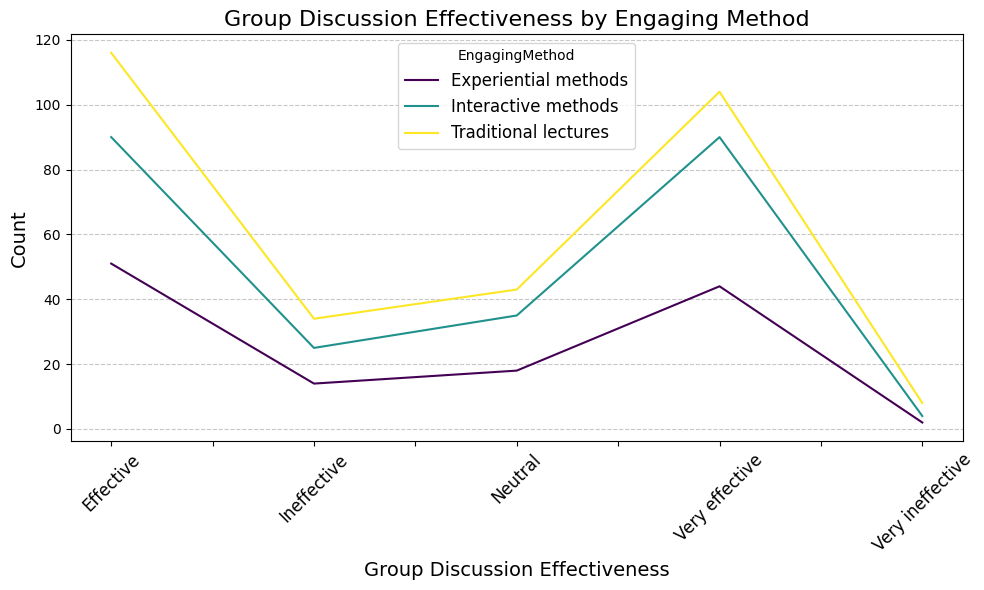

In [56]:
# Group Discussion Effectiveness vs. EngagingMethod
group_vs_method = pd.crosstab(df['GroupDiscussion'], df['EngagingMethod'])

# Plot
group_vs_method.plot(kind='line', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Group Discussion Effectiveness by Engaging Method', fontsize=16)
plt.xlabel('Group Discussion Effectiveness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='EngagingMethod', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Motivation During Teaching-Learning vs. EngagingMethod

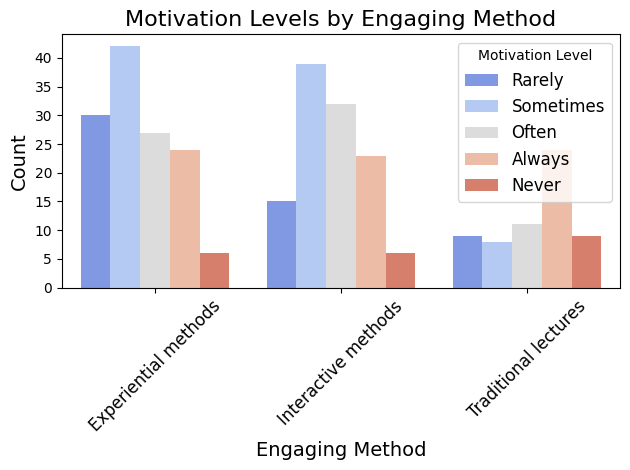

In [58]:
# MotivationDuringTL vs. EngagingMethod
sns.countplot(data=df, x='EngagingMethod', hue='MotivationDuringTL', palette='coolwarm')
plt.title('Motivation Levels by Engaging Method', fontsize=16)
plt.xlabel('Engaging Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Motivation Level', fontsize=12)
plt.tight_layout()
plt.show()


### Retention vs. EngagingMethod

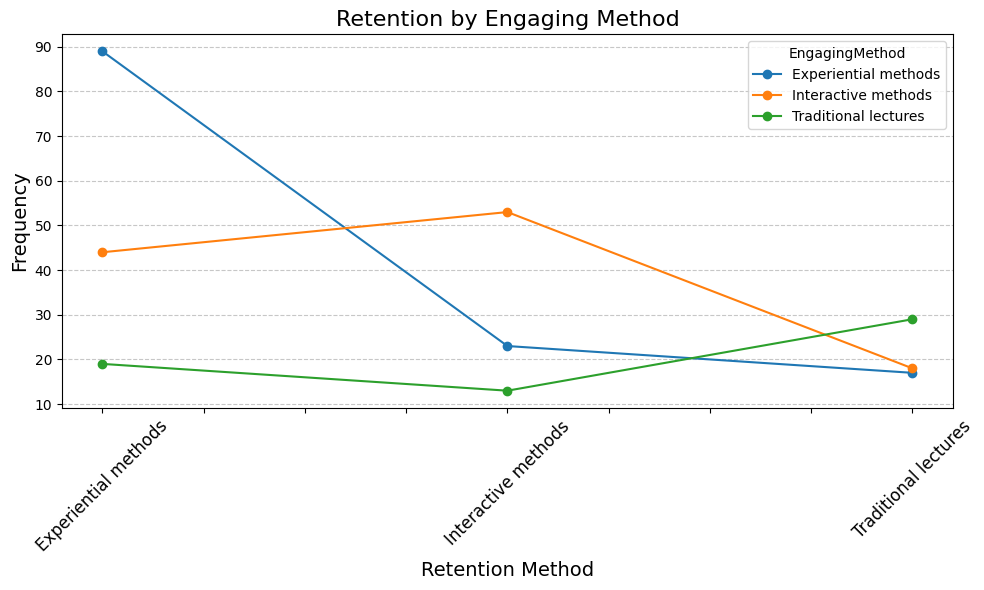

In [60]:
# Retention vs. EngagingMethod
retention_vs_method = pd.crosstab(df['Retention'], df['EngagingMethod'])

# Line plot
retention_vs_method.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Retention by Engaging Method', fontsize=16)
plt.xlabel('Retention Method', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### AgeGroup vs. EngagingMethod

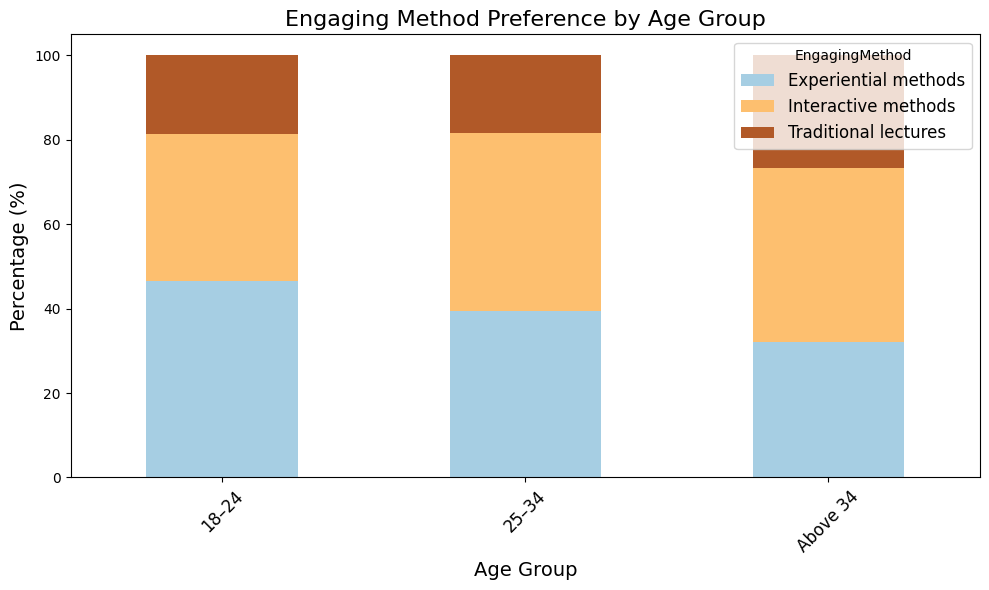

In [62]:
# AgeGroup vs. EngagingMethod
age_vs_method = pd.crosstab(df['AgeGroup'], df['EngagingMethod'], normalize='index') * 100

# Stacked bar plot
age_vs_method.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Engaging Method Preference by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='EngagingMethod', fontsize=12)
plt.tight_layout()
plt.show()

## Statisical Analysis 

### By Using Chi Saqure

In [64]:
# Function to perform and display chi-square test for a given column
def perform_chi_square_test(col, target):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Hypotheses
    null_hypothesis = f"Null Hypothesis (H0): {col} and {target} are independent."
    alt_hypothesis = f"Alternative Hypothesis (H1): {col} and {target} are not independent (they are associated)."

    # Display results
    print(f"\nChi-Square Test for {col} and {target}:")
    print(null_hypothesis)
    print(alt_hypothesis)
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    if p <= 0.05:
        print(f"Decision: Reject the null hypothesis. {col} and {target} are associated.")
    else:
        print(f"Decision: Fail to reject the null hypothesis. {col} and {target} are independent.")


In [66]:
# Target column
target_column = 'EngagingMethod'

# Recommended columns
recommended_columns = [
    'MotivationDuringTL', 'HandsOnActivityHelp', 'TLPerformance', 'GroupDiscussion',
    'MultimediaEffectiveness', 'TeacherInteraction', 'IMEncourageness', 'PeerLearning',
    'Retention', 'AgeGroup'
]

# Perform tests for each recommended column
for col in recommended_columns:
    perform_chi_square_test(col, target_column)


Chi-Square Test for MotivationDuringTL and EngagingMethod:
Null Hypothesis (H0): MotivationDuringTL and EngagingMethod are independent.
Alternative Hypothesis (H1): MotivationDuringTL and EngagingMethod are not independent (they are associated).
Chi-Square Statistic: 28.1929
p-value: 0.0004
Degrees of Freedom: 8
Decision: Reject the null hypothesis. MotivationDuringTL and EngagingMethod are associated.

Chi-Square Test for HandsOnActivityHelp and EngagingMethod:
Null Hypothesis (H0): HandsOnActivityHelp and EngagingMethod are independent.
Alternative Hypothesis (H1): HandsOnActivityHelp and EngagingMethod are not independent (they are associated).
Chi-Square Statistic: 22.5470
p-value: 0.0040
Degrees of Freedom: 8
Decision: Reject the null hypothesis. HandsOnActivityHelp and EngagingMethod are associated.

Chi-Square Test for TLPerformance and EngagingMethod:
Null Hypothesis (H0): TLPerformance and EngagingMethod are independent.
Alternative Hypothesis (H1): TLPerformance and Engaging

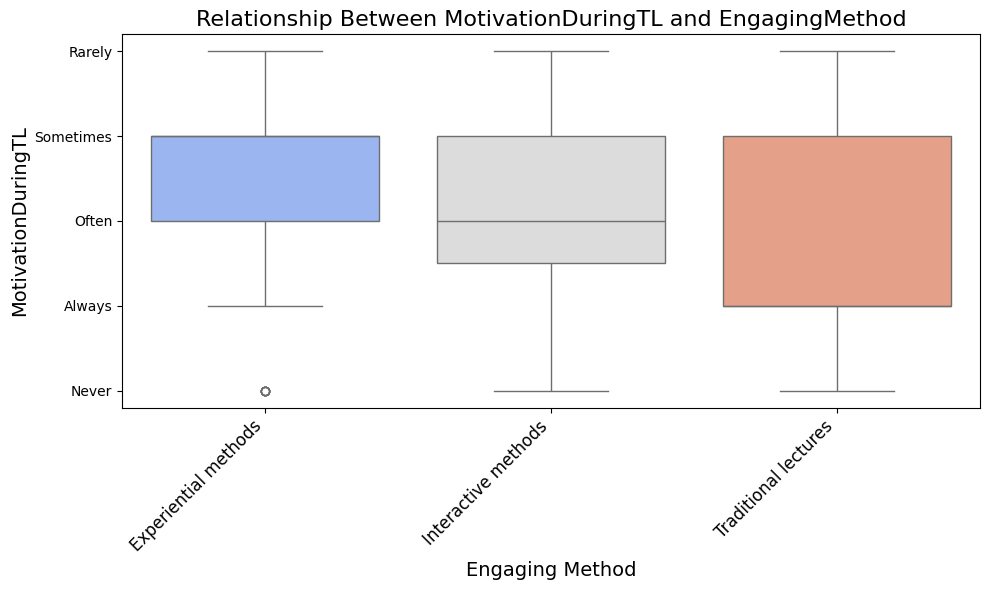

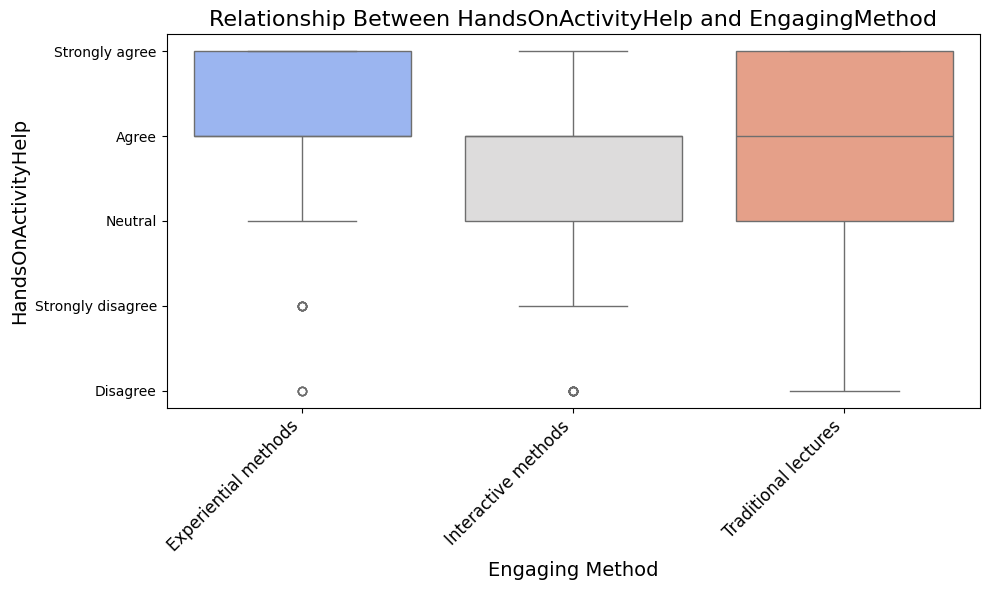

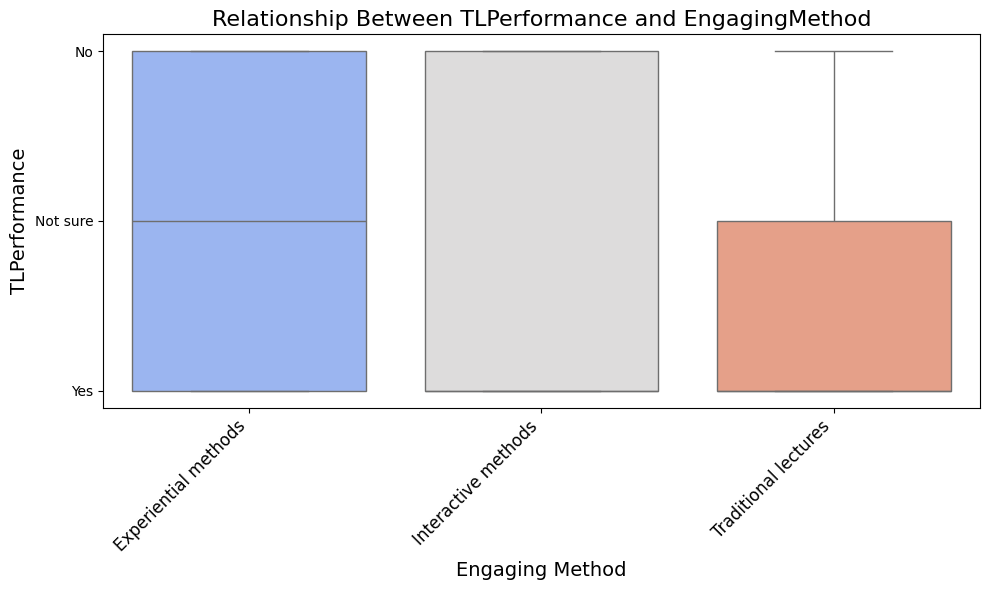

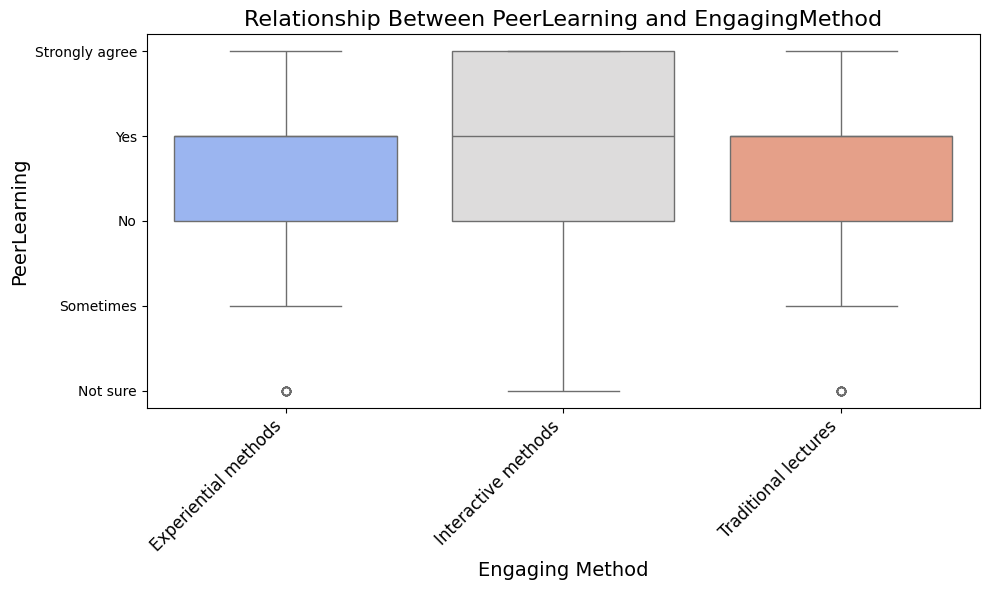

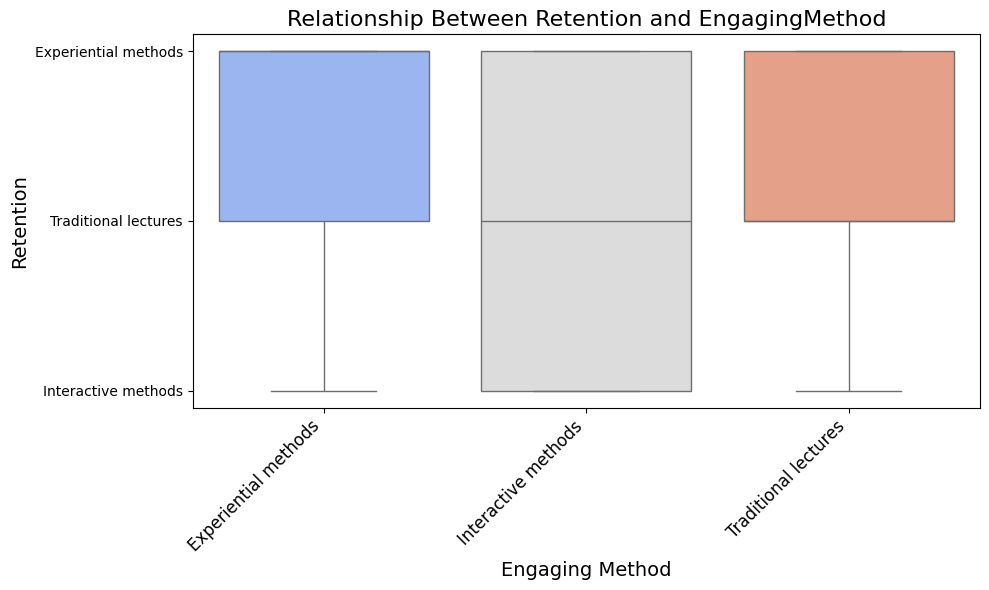

In [72]:
for col in significant_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='EngagingMethod', y=col, palette='coolwarm')
    plt.title(f'Relationship Between {col} and EngagingMethod', fontsize=16)
    plt.xlabel('Engaging Method', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.tight_layout()
    plt.show()


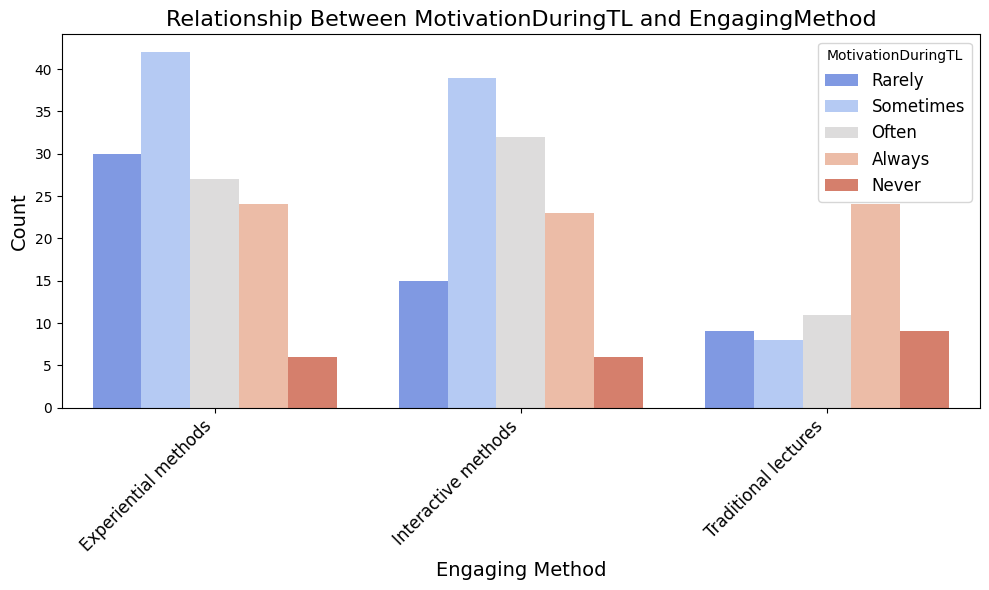

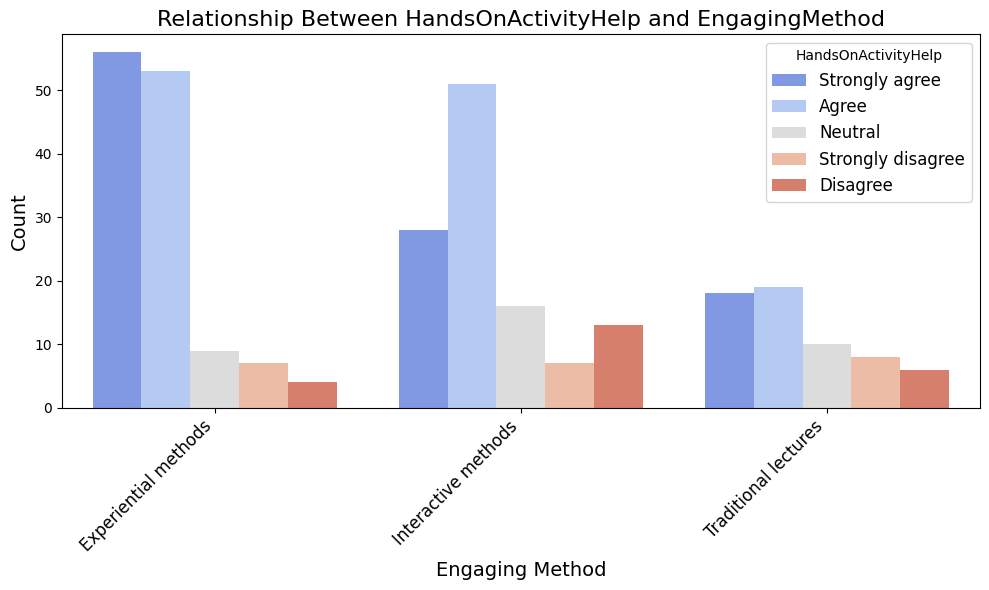

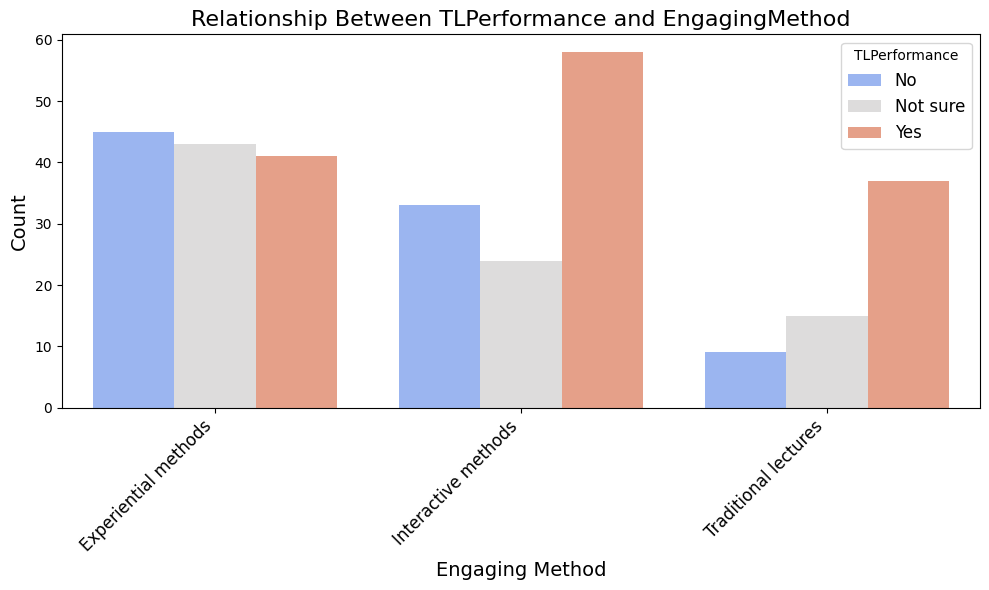

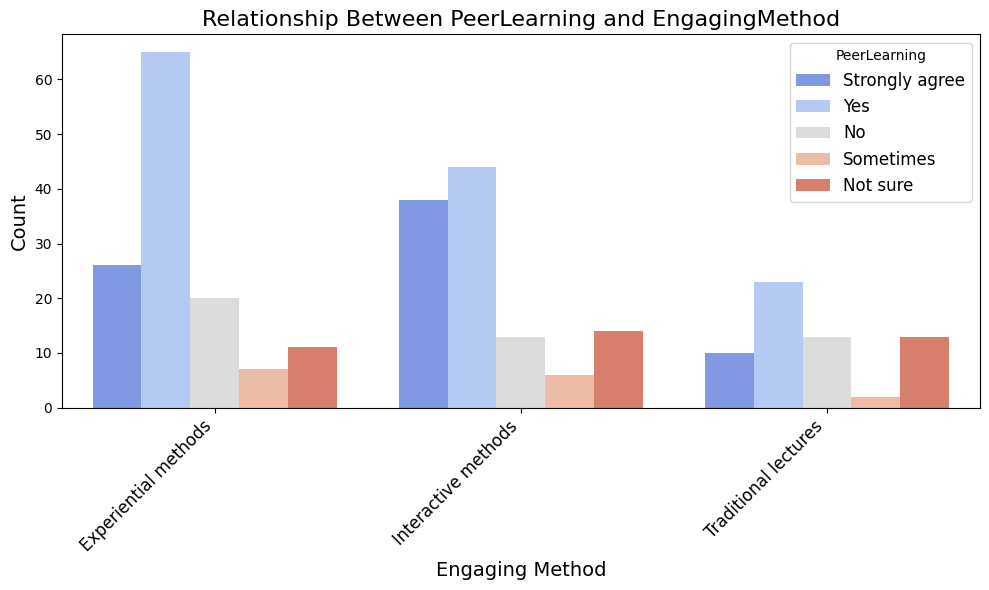

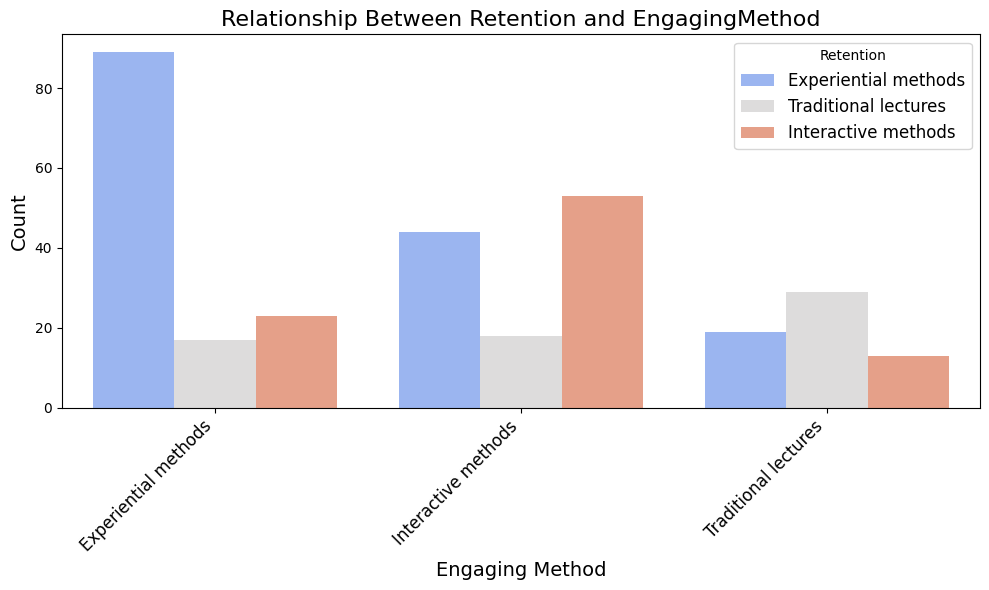

In [70]:
# List of variables with significant association from chi-square results
significant_columns = [
    'MotivationDuringTL', 'HandsOnActivityHelp', 'TLPerformance', 'PeerLearning', 'Retention'
]

# Visualize chi-square results with bar plots for significant variables
for col in significant_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='EngagingMethod', hue=col, palette='coolwarm')
    plt.title(f'Relationship Between {col} and EngagingMethod', fontsize=16)
    plt.xlabel('Engaging Method', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.legend(title=col, fontsize=12)
    plt.tight_layout()
    plt.show()


## Encoding Features

### Ordinal Encoding

In [74]:
# Identify ordinal variables for comparison
ordinal_columns = [
    'MotivationDuringTL', 'HandsOnActivityHelp', 'PeerLearning', 'Retention'
]

# Map ordinal variables to numeric values for Kruskal-Wallis test
ordinal_mappings = {
    'MotivationDuringTL': {'Never':1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5},
    'HandsOnActivityHelp': {'Strongly disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5},
    'PeerLearning': {'No': 1, "Not sure":2, 'Sometimes':3, 'Neutral': 4, 'Yes': 5, 'Strongly agree': 6},
    'Retention': {'Traditional lectures': 1, 'Experiential methods': 2, 'Interactive methods':3}
}
for col in ordinal_columns:
    if col in ordinal_mappings:
        # Map the ordinal variable to numeric values
        df[col + '_numeric'] = df[col].map(ordinal_mappings[col])
print("Mapped Columns:")
df[['MotivationDuringTL_numeric','HandsOnActivityHelp_numeric','PeerLearning_numeric','Retention_numeric']].head()

Mapped Columns:


,MotivationDuringTL_numeric,HandsOnActivityHelp_numeric,PeerLearning_numeric,Retention_numeric
0,2,5,6,2
1,3,5,5,2
2,2,5,5,2
3,4,4,5,1
4,4,4,1,2


### AgeGroup and Gender Encoded

In [76]:
# Define mappings for Gender and AgeGroup
gender_mapping = {
    'Male': 0,
    'Female': 1
}

age_group_mapping = {
    '18–24': 1,
    '25–34': 2,
    'Above 34': 3
}

# Apply mappings to the dataset
df['Gender_numeric'] = df['Gender'].map(gender_mapping)
df['AgeGroup_numeric'] = df['AgeGroup'].map(age_group_mapping)

# Display the updated dataset with mapped columns
print("Mapped Columns:")
df[['Gender', 'Gender_numeric', 'AgeGroup', 'AgeGroup_numeric']].head()


Mapped Columns:


,Gender,Gender_numeric,AgeGroup,AgeGroup_numeric
0,Male,0,Above 34,3
1,Male,0,25–34,2
2,Female,1,18–24,1
3,Male,0,18–24,1
4,Female,1,25–34,2


### EngagingMethod Encoded : Target Column

In [78]:
# Update the mapping for the target variable (EngagingMethod)
engaging_method_mapping = {
    'Experiential methods': 1,
    'Interactive methods': 2,
    'Traditional lectures': 3
}
df['EngagingMethod_numeric'] = df['EngagingMethod'].map(engaging_method_mapping)
# Display the updated dataset with mapped columns
print("Mapped Columns:")
df[['EngagingMethod_numeric']].head()

Mapped Columns:


,EngagingMethod_numeric
0,1
1,1
2,2
3,3
4,1


### Label Encoding

In [80]:
# Columns to encode
columns_to_encode = [
    "TLPerformance", "GroupDiscussion", "MultimediaEffectiveness", 
    "TeacherInteraction", "IMEncourageness", "ELinRealWorld", 
    "PreferMedia", "ChallengesTL"
]
# Initialize the label encoder
label_encoder = LabelEncoder()

# Add new encoded columns while preserving the original ones
for column in columns_to_encode:
    df[f"{column}_numeric"] = label_encoder.fit_transform(df[column])

# Check the shape and the first few rows after adding encoded columns
updated_shape_with_new_columns = df.shape
encoded_columns_preview = df.head()

In [117]:
df.head()

,Gender,EngagingMethod,MotivationDuringTL,HandsOnActivityHelp,TLPerformance,GroupDiscussion,MultimediaEffectiveness,TeacherInteraction,IMEncourageness,PeerLearning,...,AgeGroup_numeric,EngagingMethod_numeric,TLPerformance_numeric,GroupDiscussion_numeric,MultimediaEffectiveness_numeric,TeacherInteraction_numeric,IMEncourageness_numeric,ELinRealWorld_numeric,PreferMedia_numeric,ChallengesTL_numeric
0,Male,Experiential methods,Rarely,Strongly agree,No,Very effective,Good,Rarely,Strongly agree,Strongly agree,...,3,1,0,3,2,3,3,3,0,0
1,Male,Experiential methods,Sometimes,Strongly agree,No,Very effective,Excellent,Often,Agree,Yes,...,2,1,0,3,1,2,0,3,3,1
2,Female,Interactive methods,Rarely,Strongly agree,Not sure,Very effective,Excellent,Sometimes,Neutral,Yes,...,1,2,1,3,1,4,2,0,2,2
3,Male,Traditional lectures,Often,Agree,Yes,Neutral,Excellent,Often,Neutral,Yes,...,1,3,2,2,1,2,2,2,3,0
4,Female,Experiential methods,Often,Agree,Yes,Neutral,Good,Sometimes,Agree,No,...,2,1,2,2,2,4,0,3,3,1


## Kruskal-Wallis Test: To compare ordinal variables across engaging methods

In [83]:
# Initialize a dictionary to store the Kruskal-Wallis test results
results = {}
# Perform the Kruskal-Wallis test for each ordinal variable across EngagingMethod groups
for col in ordinal_columns:
    if col + '_numeric' in df.columns:
        # Group data by EngagingMethod
        groups = [group[col + '_numeric'].dropna() for _, group in df.groupby('EngagingMethod')]

        # Apply Kruskal-Wallis test
        stat, p = kruskal(*groups)
        results[col] = {'Statistic': stat, 'p-value': p}

# Display the results
for col, result in results.items():
    print(f"\nKruskal-Wallis Test for {col} across EngagingMethod:")
    print(f"Test Statistic: {result['Statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    if result['p-value'] <= 0.05:
        print("Conclusion: There is a significant difference across EngagingMethod groups.")
    else:
        print("Conclusion: There is no significant difference across EngagingMethod groups.")



Kruskal-Wallis Test for MotivationDuringTL across EngagingMethod:
Test Statistic: 3.6370
p-value: 0.1623
Conclusion: There is no significant difference across EngagingMethod groups.

Kruskal-Wallis Test for HandsOnActivityHelp across EngagingMethod:
Test Statistic: 15.4815
p-value: 0.0004
Conclusion: There is a significant difference across EngagingMethod groups.

Kruskal-Wallis Test for PeerLearning across EngagingMethod:
Test Statistic: 8.7526
p-value: 0.0126
Conclusion: There is a significant difference across EngagingMethod groups.

Kruskal-Wallis Test for Retention across EngagingMethod:
Test Statistic: 26.0955
p-value: 0.0000
Conclusion: There is a significant difference across EngagingMethod groups.


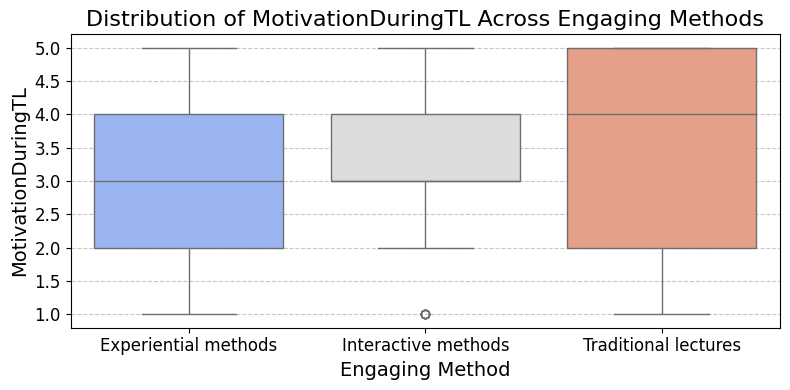

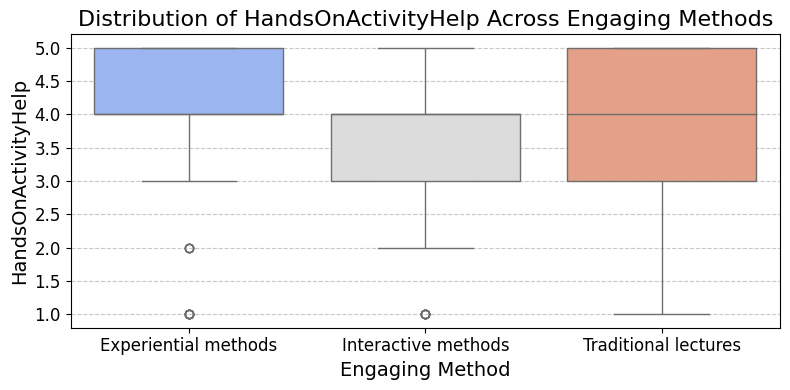

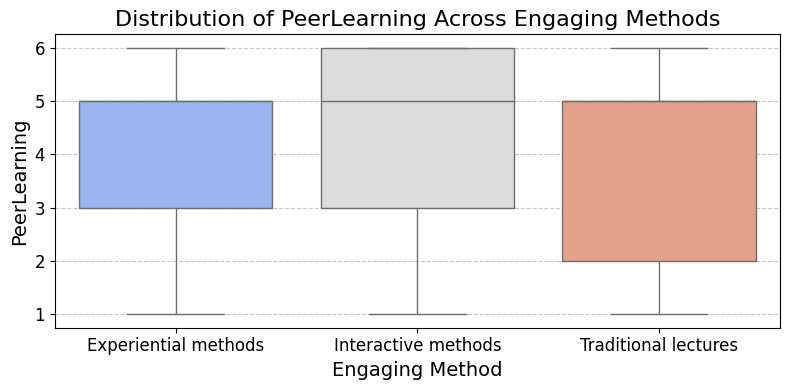

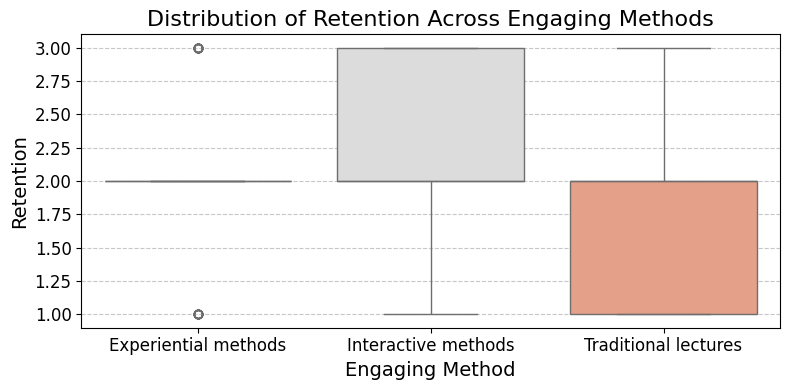

In [819]:
# Visualize distributions using box plots for each ordinal variable
for col in ordinal_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='EngagingMethod', y=col + '_numeric', palette='coolwarm')
    plt.title(f"Distribution of {col} Across Engaging Methods", fontsize=16)
    plt.xlabel("Engaging Method", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Spearman's rank correlation between all ordinal variables

In [85]:
# Calculate Spearman's rank correlation between all ordinal variables
results = {}
for col1 in ordinal_columns:
    for col2 in ordinal_columns:
        if col1 != col2:  # Exclude self-correlation
            stat, p = spearmanr(df[col1 + '_numeric'], df[col2 + '_numeric'])
            results[(col1, col2)] = {'Spearman Correlation': stat, 'p-value': p}

# Display results
for pair, result in results.items():
    print(f"\nSpearman’s Rank Correlation between {pair[0]} and {pair[1]}:")
    print(f"Correlation Coefficient: {result['Spearman Correlation']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    if result['p-value'] <= 0.05:
        print("Conclusion: Significant correlation.")
    else:
        print("Conclusion: No significant correlation.")


Spearman’s Rank Correlation between MotivationDuringTL and HandsOnActivityHelp:
Correlation Coefficient: 0.0231
p-value: 0.6879
Conclusion: No significant correlation.

Spearman’s Rank Correlation between MotivationDuringTL and PeerLearning:
Correlation Coefficient: 0.0863
p-value: 0.1328
Conclusion: No significant correlation.

Spearman’s Rank Correlation between MotivationDuringTL and Retention:
Correlation Coefficient: -0.0570
p-value: 0.3210
Conclusion: No significant correlation.

Spearman’s Rank Correlation between HandsOnActivityHelp and MotivationDuringTL:
Correlation Coefficient: 0.0231
p-value: 0.6879
Conclusion: No significant correlation.

Spearman’s Rank Correlation between HandsOnActivityHelp and PeerLearning:
Correlation Coefficient: 0.3516
p-value: 0.0000
Conclusion: Significant correlation.

Spearman’s Rank Correlation between HandsOnActivityHelp and Retention:
Correlation Coefficient: 0.1123
p-value: 0.0501
Conclusion: No significant correlation.

Spearman’s Rank Cor

### Correlation of Engaging Method to All Feature

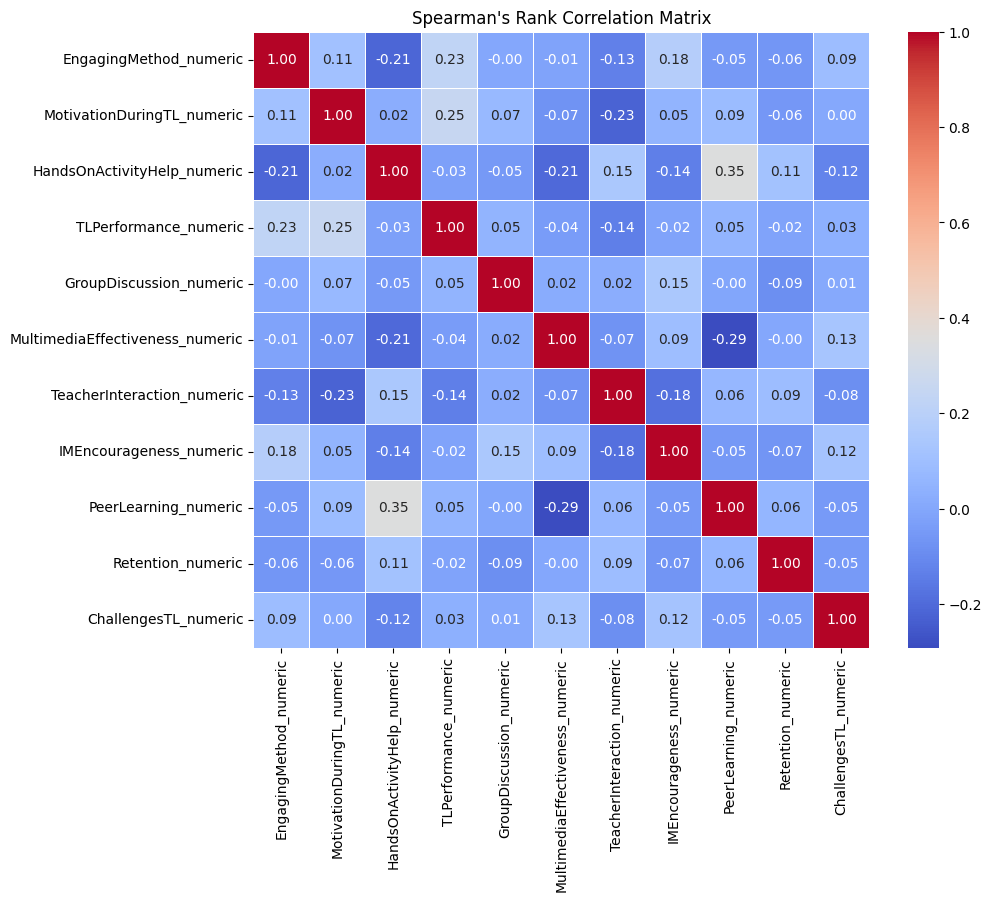

In [87]:
# Select the relevant columns for Spearman's Rank Correlation calculation
columns_to_check = ['EngagingMethod_numeric', 'MotivationDuringTL_numeric', 'HandsOnActivityHelp_numeric', 
                    'TLPerformance_numeric', 'GroupDiscussion_numeric', 'MultimediaEffectiveness_numeric', 
                    'TeacherInteraction_numeric', 'IMEncourageness_numeric', 'PeerLearning_numeric', 
                    'Retention_numeric', 'ChallengesTL_numeric']

# Calculate the Spearman's rank correlation matrix
spearman_corr, _ = spearmanr(df[columns_to_check])

# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(spearman_corr, index=columns_to_check, columns=columns_to_check)

# Plot the Spearman's rank correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Spearman's Rank Correlation Matrix")
plt.show()

## Model Applying 

#### Select Predicted Feature

In [89]:
# Define selected features and additional features (AgeGroup_numeric, Gender_numeric)
selected_features = [
    'TLPerformance_numeric',
    'GroupDiscussion_numeric',
    'ChallengesTL_numeric',
    'MotivationDuringTL_numeric',
    'HandsOnActivityHelp_numeric',
    'PeerLearning_numeric',
    'Retention_numeric',
    'AgeGroup_numeric',  
    'Gender_numeric'     
]

#### Target Feature

In [91]:
# Prepare the feature set (X) and target (y)
X = df[selected_features]
y_encoded = df['EngagingMethod_numeric']

#### Split Data

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#### Random Forest

In [95]:
# Train and evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Report
report_rf = classification_report(y_test, y_pred_rf)

In [97]:
# Print classification reports and accuracies
print("Random Forest Accuracy: ", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)

Random Forest Accuracy:  0.5409836065573771
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.62      0.62        26
           2       0.50      0.65      0.57        23
           3       0.40      0.17      0.24        12

    accuracy                           0.54        61
   macro avg       0.51      0.48      0.47        61
weighted avg       0.53      0.54      0.52        61



#### Logistic Regression

In [99]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
#Report
report_logreg = classification_report(y_test, y_pred_logreg)

In [101]:
print("Logistic Regression Accuracy: ", accuracy_logreg)
print("Logistic Regression Classification Report:\n", report_logreg)

Logistic Regression Accuracy:  0.5081967213114754
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.69      0.60        26
           2       0.50      0.52      0.51        23
           3       0.33      0.08      0.13        12

    accuracy                           0.51        61
   macro avg       0.45      0.43      0.41        61
weighted avg       0.48      0.51      0.47        61



### Gradient Boosting Classifier

In [113]:
# Train and evaluate Gradient Boosting Classifier
gbc_classifier = GradientBoostingClassifier(random_state=42)
gbc_classifier.fit(X_train, y_train)
y_pred_gbc = gbc_classifier.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
# Generate Classification Reports
report_gbc = classification_report(y_test, y_pred_gbc)

In [115]:
print("Gradient Boosting Accuracy: ", accuracy_gbc)
print("Gradient Boosting Classification Report:\n", report_gbc)

Gradient Boosting Accuracy:  0.5901639344262295
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.62      0.63        26
           2       0.58      0.65      0.61        23
           3       0.50      0.42      0.45        12

    accuracy                           0.59        61
   macro avg       0.57      0.56      0.56        61
weighted avg       0.59      0.59      0.59        61



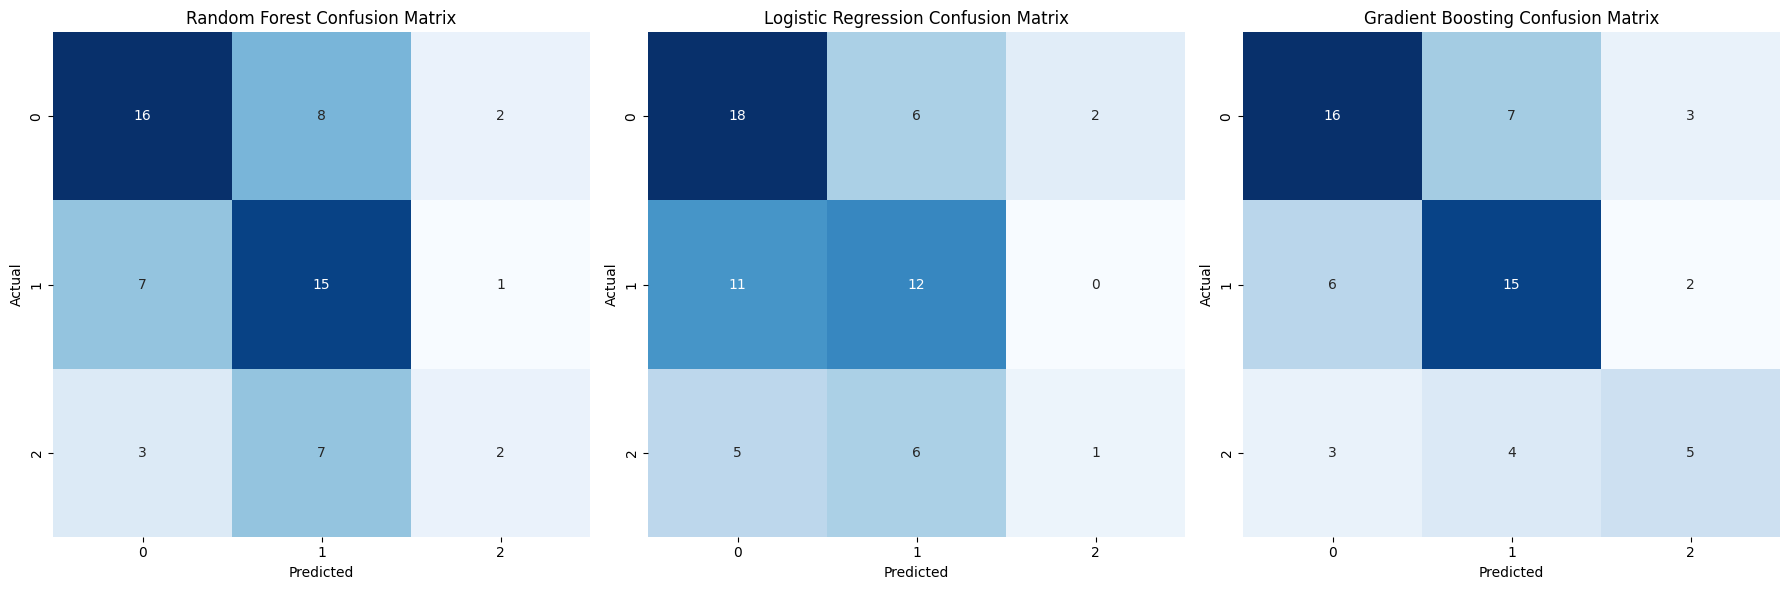

In [117]:
# Generate Confusion Matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', ax=axes[2], cbar=False)
axes[2].set_title("Gradient Boosting Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()